In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kodiak
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | polunochnoye
Processing Record 4 of Set 1 | tual
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | samusu
City not found. Skipping...
Processing Record 8 of Set 1 | cockburn town
Processing Record 9 of Set 1 | pavino
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | awjilah
Processing Record 12 of Set 1 | castro
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | puerto ayora
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | yarada
Processing Record 18 of Set 1 | fortuna
Processing Record 19 of Set 1 | barrow
Processing Record 20 of Set 1 | butaritari
Processing Record 21 of Set 1 | bejar
Processing Record 22 of Set 1 | bussel

Processing Record 34 of Set 4 | poum
Processing Record 35 of Set 4 | faanui
Processing Record 36 of Set 4 | huarmey
Processing Record 37 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 38 of Set 4 | buqayq
City not found. Skipping...
Processing Record 39 of Set 4 | saint anthony
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | tefe
Processing Record 42 of Set 4 | verkhoyansk
Processing Record 43 of Set 4 | zwedru
Processing Record 44 of Set 4 | sitka
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | yerbogachen
Processing Record 47 of Set 4 | rio grande
Processing Record 48 of Set 4 | garowe
Processing Record 49 of Set 4 | kapaa
Processing Record 50 of Set 4 | itacoatiara
Processing Record 1 of Set 5 | sept-iles
Processing Record 2 of Set 5 | california city
Processing Record 3 of Set 5 | guelengdeng
City not found. Skipping...
Processing Record 4 of Set 5 | nizwa
Processing Record 5 of Set 5 | gat
Processing Record 6 of 

City not found. Skipping...
Processing Record 24 of Set 8 | grand gaube
Processing Record 25 of Set 8 | nam tha
City not found. Skipping...
Processing Record 26 of Set 8 | la libertad
Processing Record 27 of Set 8 | podosinovets
Processing Record 28 of Set 8 | atlantic beach
Processing Record 29 of Set 8 | velsk
Processing Record 30 of Set 8 | beloha
Processing Record 31 of Set 8 | jian
Processing Record 32 of Set 8 | tougan
Processing Record 33 of Set 8 | uyemskiy
Processing Record 34 of Set 8 | ambovombe
Processing Record 35 of Set 8 | kulhudhuffushi
Processing Record 36 of Set 8 | avera
Processing Record 37 of Set 8 | sao gabriel da cachoeira
Processing Record 38 of Set 8 | visnes
Processing Record 39 of Set 8 | rorvik
Processing Record 40 of Set 8 | mantua
Processing Record 41 of Set 8 | fairbanks
Processing Record 42 of Set 8 | benguela
Processing Record 43 of Set 8 | kaitangata
Processing Record 44 of Set 8 | yulara
Processing Record 45 of Set 8 | iraquara
Processing Record 46 of

Processing Record 12 of Set 12 | bhakkar
Processing Record 13 of Set 12 | maxixe
Processing Record 14 of Set 12 | barentu
Processing Record 15 of Set 12 | batagay
Processing Record 16 of Set 12 | rochegda
Processing Record 17 of Set 12 | zhanakorgan
Processing Record 18 of Set 12 | port shepstone
Processing Record 19 of Set 12 | oga
Processing Record 20 of Set 12 | havelock
Processing Record 21 of Set 12 | waupun
Processing Record 22 of Set 12 | katobu
Processing Record 23 of Set 12 | broken hill
Processing Record 24 of Set 12 | quchan
Processing Record 25 of Set 12 | tulsipur
Processing Record 26 of Set 12 | wanning
Processing Record 27 of Set 12 | miles city
Processing Record 28 of Set 12 | komsomolskiy
Processing Record 29 of Set 12 | ixtapa
Processing Record 30 of Set 12 | udachnyy
Processing Record 31 of Set 12 | margate
Processing Record 32 of Set 12 | altamira
Processing Record 33 of Set 12 | lolodorf
Processing Record 34 of Set 12 | djibo
Processing Record 35 of Set 12 | chicam

In [10]:
# Counting the total number of records retrieved
len(city_data)

563

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kodiak,57.7900,-152.4072,32.77,63,67,8.46,US,2022-03-24 02:57:02
1,Punta Arenas,-53.1500,-70.9167,46.51,49,0,17.27,CL,2022-03-24 02:57:02
2,Polunochnoye,60.8697,60.4153,15.71,79,31,6.73,RU,2022-03-24 02:57:02
3,Tual,-5.6667,132.7500,79.68,85,100,24.47,ID,2022-03-24 02:57:03
4,Rikitea,-23.1203,-134.9692,79.54,71,100,13.29,PF,2022-03-24 02:57:03
5,Hilo,19.7297,-155.0900,73.13,93,100,9.22,US,2022-03-24 02:55:17
6,Cockburn Town,21.4612,-71.1419,77.95,77,0,24.61,TC,2022-03-24 02:56:33
7,Pavino,59.1139,46.1414,28.76,90,100,5.77,RU,2022-03-24 02:57:04
8,Ushuaia,-54.8000,-68.3000,47.86,40,75,16.11,AR,2022-03-24 02:55:13
9,Awjilah,29.1081,21.2869,48.87,69,0,7.90,LY,2022-03-24 02:57:05


In [12]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kodiak,US,2022-03-24 02:57:02,57.7900,-152.4072,32.77,63,67,8.46
1,Punta Arenas,CL,2022-03-24 02:57:02,-53.1500,-70.9167,46.51,49,0,17.27
2,Polunochnoye,RU,2022-03-24 02:57:02,60.8697,60.4153,15.71,79,31,6.73
3,Tual,ID,2022-03-24 02:57:03,-5.6667,132.7500,79.68,85,100,24.47
4,Rikitea,PF,2022-03-24 02:57:03,-23.1203,-134.9692,79.54,71,100,13.29
5,Hilo,US,2022-03-24 02:55:17,19.7297,-155.0900,73.13,93,100,9.22
6,Cockburn Town,TC,2022-03-24 02:56:33,21.4612,-71.1419,77.95,77,0,24.61
7,Pavino,RU,2022-03-24 02:57:04,59.1139,46.1414,28.76,90,100,5.77
8,Ushuaia,AR,2022-03-24 02:55:13,-54.8000,-68.3000,47.86,40,75,16.11
9,Awjilah,LY,2022-03-24 02:57:05,29.1081,21.2869,48.87,69,0,7.90


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

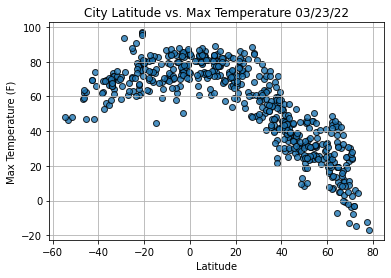

In [15]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

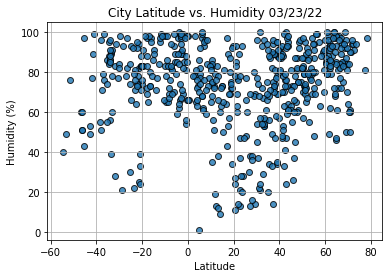

In [16]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

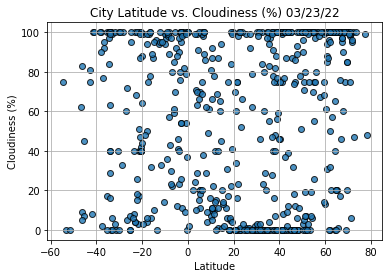

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

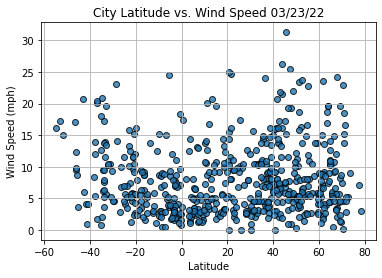

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

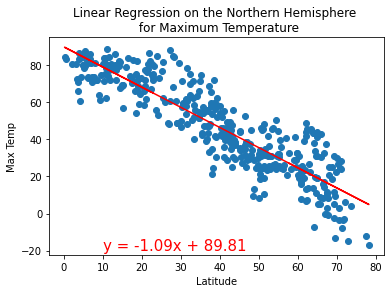

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,-20))

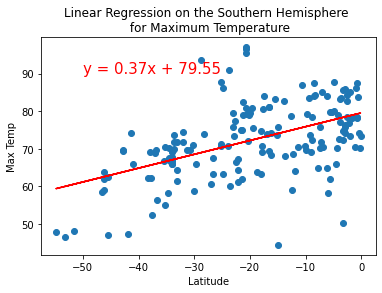

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

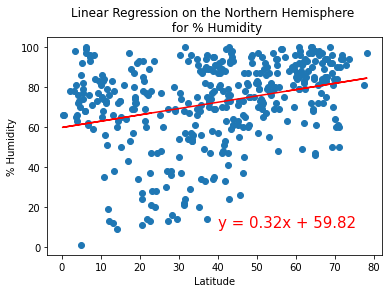

In [23]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

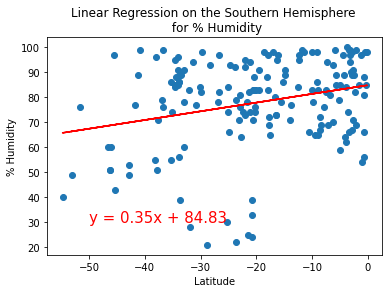

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,30))

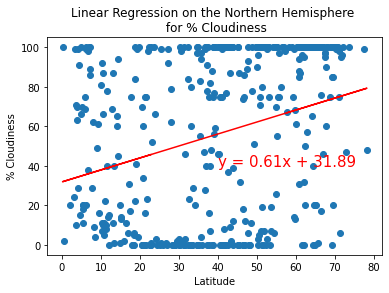

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(40,40))

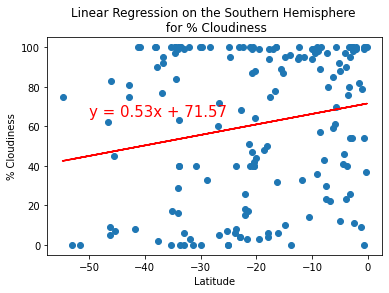

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,65))

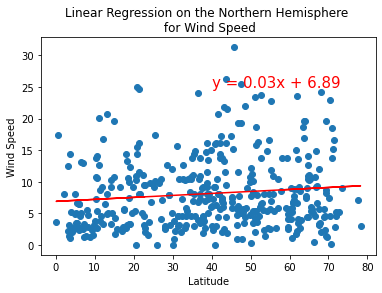

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25))

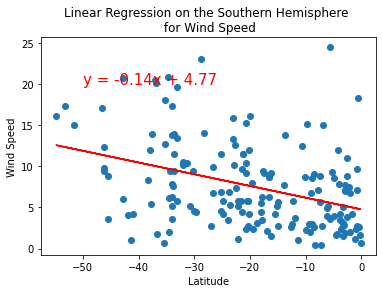

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,20))